In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils_ccd import get_connection

conn = get_connection()

In [2]:
conn = get_connection()

In [7]:
sql_nereu = """
SELECT p.numero_processo, p.ano_processo, p.codigo_tipo_processo, p.assunto, r.nome, pm.Descricao as marcador
FROM processo.dbo.Processos p 
	INNER JOIN processo.dbo.Pro_MarcadorProcesso pmp ON p.IdProcesso = pmp.IdProcesso
	INNER JOIN processo.dbo.Pro_Marcador pm ON pm.IdMarcador = pmp.IdMarcador 
	INNER JOIN processo.dbo.Relator r ON r.codigo = p.codigo_relator 
WHERE setor_atual = 'CCD' 
	AND lower(pm.Descricao) = 'DESCONTO EM FOLHA - Nereu'
"""
processos_nereu = pd.read_sql(sql_nereu, conn)

/tmp/ipykernel_235576/2968565797.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  processos_nereu = pd.read_sql(sql_nereu, conn)


In [8]:
processos_nereu

,numero_processo,ano_processo,codigo_tipo_processo,assunto,nome,marcador
0,011525,2009,APO,APOSENTADORIA ...,CARLOS THOMPSON COSTA FERNANDES,DESCONTO EM FOLHA - Nereu
1,012970,2017,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,CARLOS THOMPSON COSTA FERNANDES,DESCONTO EM FOLHA - Nereu
2,000096,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
3,000098,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
4,000099,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
...,...,...,...,...,...,...
338,004898,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
339,004901,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,PAULO ROBERTO CHAVES ALVES,DESCONTO EM FOLHA - Nereu
340,004908,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,FRANCISCO POTIGUAR CAVALCANTI JÚNIOR,DESCONTO EM FOLHA - Nereu
341,000069,2025,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,CARLOS THOMPSON COSTA FERNANDES,DESCONTO EM FOLHA - Nereu


In [13]:
nereu_relator = processos_nereu.groupby('nome').numero_processo.count().reset_index().sort_values('numero_processo', ascending=False)

In [15]:
nereu_relator.columns = ['Relator', 'Quantidade']

In [16]:
nereu_relator

,Relator,Quantidade
1,ANTONIO ED SOUZA SANTANA,158
5,PAULO ROBERTO CHAVES ALVES,82
3,CARLOS THOMPSON COSTA FERNANDES,55
2,ANTONIO GILBERTO DE OLIVEIRA JALES,34
0,ANA PAULA DE OLIVEIRA GOMES,13
4,FRANCISCO POTIGUAR CAVALCANTI JÚNIOR,1


/tmp/ipykernel_235576/1614309008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nereu_relator, x='Relator', y='Quantidade', palette='viridis')


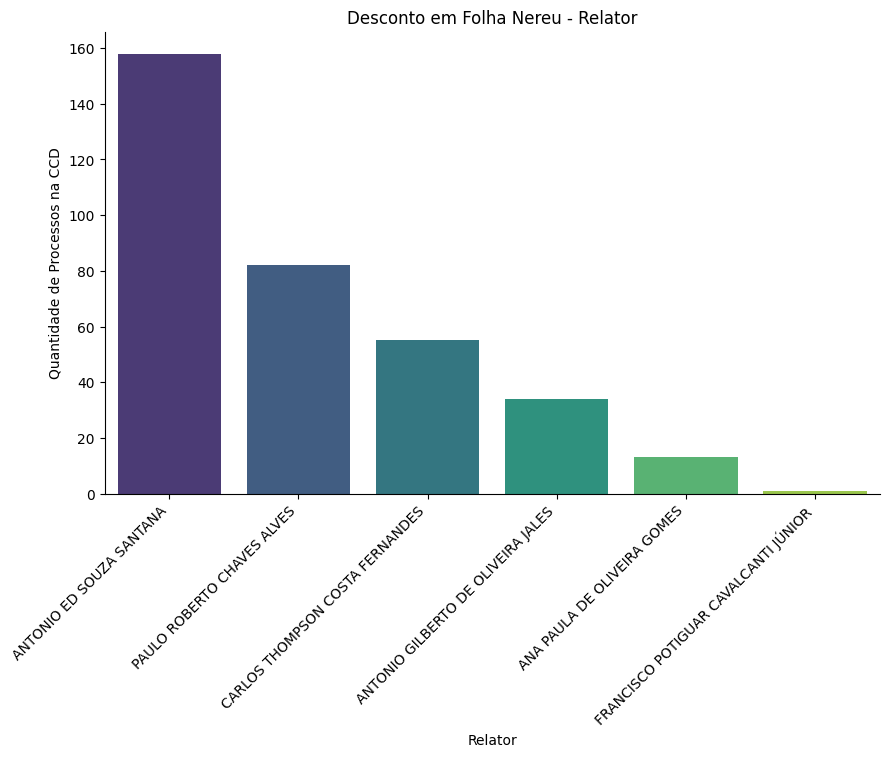

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=nereu_relator, x='Relator', y='Quantidade', palette='viridis')
plt.xticks(rotation=45, ha='right')
sns.despine(right=True, top=True)
plt.title('Desconto em Folha Nereu - Relator')
plt.xlabel('Relator')
plt.ylabel('Quantidade de Processos na CCD')
plt.show()

In [22]:
processos_ed = processos_nereu[processos_nereu.nome == 'ANTONIO ED SOUZA SANTANA']

In [24]:
processos_ed.codigo_tipo_processo.unique()

array(['EXE'], dtype=object)

In [25]:
processos_ed

,numero_processo,ano_processo,codigo_tipo_processo,assunto,nome,marcador
2,000096,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
3,000098,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
4,000099,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
6,000110,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
7,000137,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
...,...,...,...,...,...,...
326,003397,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
327,003401,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
328,003409,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
329,003410,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu


In [27]:
sql_debitos = '''  
SELECT DISTINCT pro.numero_processo,
       pro.ano_processo,
       pro.assunto,
       pm.Descricao as descricao,
       CONCAT(gp.Nome, ' (CPF: ', gp.Documento, ')') as nome,
       processo.dbo.fn_Exe_RetornaValorAtualizado(ed.IdDebito) as valor_multa,
       ed.CodigoStatusDivida as status_divida,
       r.nome as relator
       
FROM processo.dbo.Processos pro
INNER JOIN processo.dbo.Pro_MarcadorProcesso pmp ON pmp.IdProcesso = pro.IdProcesso
INNER JOIN processo.dbo.Pro_Marcador pm ON pmp.IdMarcador = pm.IdMarcador
INNER JOIN processo.dbo.Relator r ON r.codigo = pro.codigo_relator 
LEFT JOIN processo.dbo.Exe_Debito ed ON ed.IdProcessoExecucao = pro.IdProcesso
LEFT JOIN processo.dbo.Exe_DebitoPessoa edp ON edp.IDDebito = ed.IdDebito
LEFT JOIN processo.dbo.GenPessoa gp ON gp.IdPessoa = edp.IDPessoa
WHERE pro.setor_atual = 'CCD'
AND pm.Descricao = 'DESCONTO EM FOLHA - Nereu'
'''

debitos = pd.read_sql(sql_debitos, conn)

/tmp/ipykernel_235576/985335495.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  debitos = pd.read_sql(sql_debitos, conn)


In [29]:
debitos_ed = debitos[debitos.relator == 'ANTONIO ED SOUZA SANTANA']

In [52]:
graph_debitos = debitos_ed.groupby('ano_processo').agg({'valor_multa': 'sum', 'numero_processo': 'count'}).reset_index()

In [53]:
pd.options.display.float_format = '{:,.2f}'.format

In [54]:
graph_debitos

,ano_processo,valor_multa,numero_processo
0,2022,"1,253,040.88",95
1,2023,"23,714.69",2
2,2024,"779,431.97",65


/tmp/ipykernel_235576/2399697021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=graph_debitos, x='ano_processo', y='valor_multa', palette='viridis')


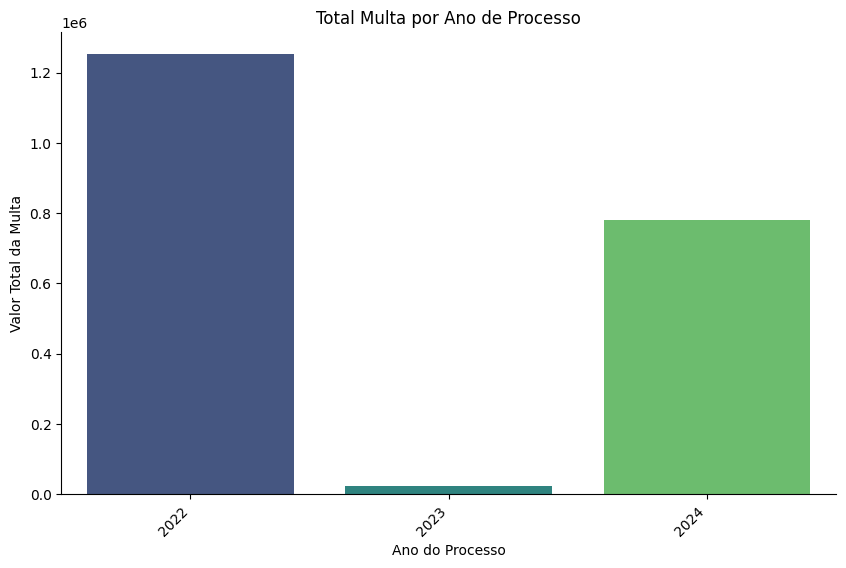

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=graph_debitos, x='ano_processo', y='valor_multa', palette='viridis')
plt.xticks(rotation=45, ha='right')
sns.despine(right=True, top=True)
plt.title('Total Multa por Ano de Processo')
plt.xlabel('Ano do Processo')
plt.ylabel('Valor Total da Multa')
plt.show()

/tmp/ipykernel_235576/3441831980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=graph_debitos, x='ano_processo', y='valor_multa', palette='viridis')


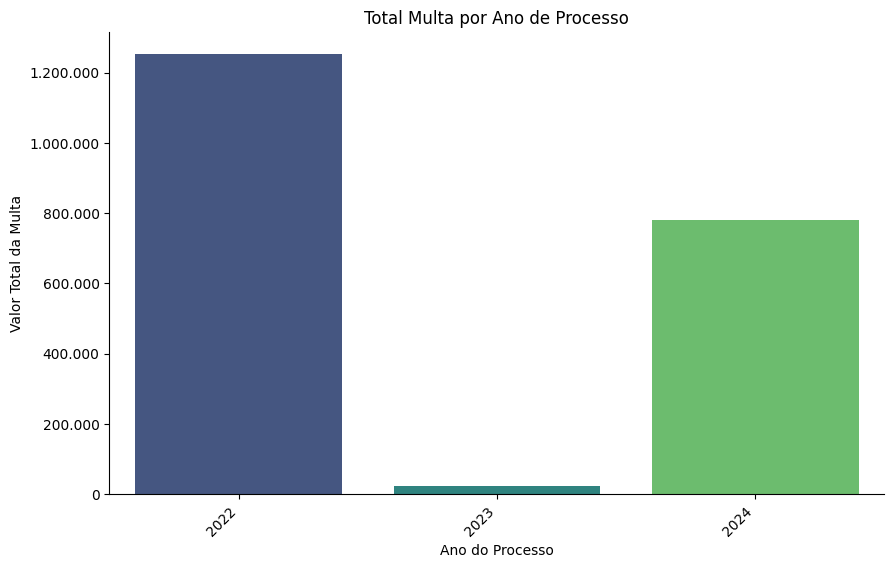

In [57]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=graph_debitos, x='ano_processo', y='valor_multa', palette='viridis')
plt.xticks(rotation=45, ha='right')
sns.despine(right=True, top=True)
plt.title('Total Multa por Ano de Processo')
plt.xlabel('Ano do Processo')
plt.ylabel('Valor Total da Multa')

# Format y-axis to avoid scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)).replace(',', '.')))

plt.show()

In [ ]:
graph_debitos['valor_multa'].sum()

np.float64(2056187.5351)

In [59]:
import locale

# Set locale to Brazilian Portuguese
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Sum of valor_multa
total_valor_multa = graph_debitos['valor_multa'].sum()

# Print the sum in BRL currency format
print(locale.currency(total_valor_multa, grouping=True))

R$ 2.056.187,54


In [61]:
print(len(debitos_ed))

162
